# Udacity Project 5: Communicate Data Findings

#### In this project I examine a dataset containing the loan information of customers of San Francisco based US company Prosper Loans. 

## Data Wrangling and Cleaning

In [1]:
#Importing all needed python libraries and packages
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from textwrap import wrap

In [2]:
#Reading in the dataset
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
#Making a copy of the data set to work with
loans_clean = loans.copy()

In [4]:
#Creating a list of needed columns
unneeded_columns = ['ListingKey', 'ListingCategory'
                  'CreditGrade', 'BorrowerAPR', 
                  'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 
                  'EstimatedLoss', 'EstimatedReturn', 'Occupation', 'CurrentlyInGroup', 
                  'GroupKey', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 
                  'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
                  'MemberKey', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'DateCreditPulled', 'FirstRecordedCreditLine'
                   'CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7Years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months',
                   'TotalInquiries', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'TotalTrades', 'TradesNeverDelinquent', 'TradesOpenedLast6Months', 'LoanFirstDefaultedCycleNumber', 'LoanNumber',
                   'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments']

#Dropping all columns not in the above list
loans_clean.drop(columns=[col for col in loans_clean if col in unneeded_columns], inplace=True)

In [5]:
#Confirming column drop
loans_clean.dtypes

ListingNumber                           int64
ListingCreationDate                    object
CreditGrade                            object
Term                                    int64
LoanStatus                             object
ClosedDate                             object
ProsperRating (numeric)               float64
ProsperRating (Alpha)                  object
ProsperScore                          float64
ListingCategory (numeric)               int64
BorrowerState                          object
EmploymentStatus                       object
EmploymentStatusDuration              float64
IsBorrowerHomeowner                      bool
CreditScoreRangeLower                 float64
CreditScoreRangeUpper                 float64
FirstRecordedCreditLine                object
CurrentCreditLines                    float64
TotalCreditLinespast7years            float64
CurrentDelinquencies                  float64
AmountDelinquent                      float64
DelinquenciesLast7Years           

In [6]:
#Set all column names to lowercase
loans_clean.columns = loans_clean.columns.str.lower()

#Remove spaces and parentheses in column names
loans_clean.columns = loans_clean.columns.str.replace('(', ' ')
loans_clean.columns = loans_clean.columns.str.replace(')', ' ')
loans_clean.columns = loans_clean.columns.str.replace(' ', '')

#Use a for loop to change certain numerical columns  
#to string/object datatype
for col in ['listingnumber', 'term']:
    loans_clean[col] = loans_clean[col].astype(str)

#Use a for loop to change certain string/object columns  
#to datetime datatype
for col in ['listingcreationdate', 'closeddate', 'firstrecordedcreditline', 'loanoriginationdate']:
    loans_clean[col] = pd.to_datetime(loans_clean[col], infer_datetime_format=True)

In [7]:
#Isolating and dropping the rows with  null values in the debttoincomeratio
#field, which will be the primary focus of my analysis
loans_clean = loans_clean[loans_clean['debttoincomeratio'].notnull()]

In [8]:
#Confirming changes in cell above
loans_clean.dtypes

listingnumber                              object
listingcreationdate                datetime64[ns]
creditgrade                                object
term                                       object
loanstatus                                 object
closeddate                         datetime64[ns]
prosperratingnumeric                      float64
prosperratingalpha                         object
prosperscore                              float64
listingcategorynumeric                      int64
borrowerstate                              object
employmentstatus                           object
employmentstatusduration                  float64
isborrowerhomeowner                          bool
creditscorerangelower                     float64
creditscorerangeupper                     float64
firstrecordedcreditline            datetime64[ns]
currentcreditlines                        float64
totalcreditlinespast7years                float64
currentdelinquencies                      float64


## Part 1: Exploratory Data Analysis

In [9]:
#Displaying the number of loans recorded and their variables
loans_clean.shape

(105383, 37)

### This dataset has 105,383 loans with 81 variables regarding each. I decided to keep 37 of those variables for my analysis. I further examine the variables in the next few cells.

In [10]:
#Displaying column names, value counts and descriptions
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105383 entries, 0 to 113936
Data columns (total 37 columns):
listingnumber                      105383 non-null object
listingcreationdate                105383 non-null datetime64[ns]
creditgrade                        27706 non-null object
term                               105383 non-null object
loanstatus                         105383 non-null object
closeddate                         50859 non-null datetime64[ns]
prosperratingnumeric               77557 non-null float64
prosperratingalpha                 77557 non-null object
prosperscore                       77557 non-null float64
listingcategorynumeric             105383 non-null int64
borrowerstate                      99940 non-null object
employmentstatus                   103157 non-null object
employmentstatusduration           97888 non-null float64
isborrowerhomeowner                105383 non-null bool
creditscorerangelower              104798 non-null float64
creditsco

In [11]:
#Displaying basic statisitics about the variables
loans_clean.describe()

,prosperratingnumeric,prosperscore,listingcategorynumeric,employmentstatusduration,creditscorerangelower,creditscorerangeupper,currentcreditlines,totalcreditlinespast7years,currentdelinquencies,amountdelinquent,...,bankcardutilization,availablebankcardcredit,tradesneverdelinquentpercentage,debttoincomeratio,statedmonthlyincome,loancurrentdaysdelinquent,loanmonthssinceorigination,loanoriginalamount,monthlyloanpayment,investors
count,77557.000000,77557.000000,105383.000000,97888.000000,104798.000000,104798.000000,97903.000000,104798.000000,104798.000000,97905.000000,...,97903.000000,97961.000000,97961.000000,105383.000000,105383.000000,105383.000000,105383.000000,105383.000000,105383.000000,105383.000000
mean,4.131761,6.061967,2.719860,96.919020,684.744365,703.744365,10.383962,26.952442,0.617226,1003.278556,...,0.565739,10949.755229,0.883851,0.275947,5650.719215,154.008037,32.298616,8444.274152,274.395949,81.721758
std,1.658808,2.362354,3.998206,94.245057,65.299683,65.299683,5.457407,13.658638,2.033376,7154.286296,...,0.317582,19382.381957,0.149538,0.551759,4941.369709,472.056041,30.433893,6335.207660,194.574205,105.087532
min,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,1.000000
25%,3.000000,4.000000,1.000000,26.000000,660.000000,679.000000,7.000000,17.000000,0.000000,0.000000,...,0.310000,845.000000,0.810000,0.140000,3333.333333,0.000000,6.000000,4000.000000,131.500000,2.000000
50%,4.000000,6.000000,1.000000,68.000000,680.000000,699.000000,10.000000,25.000000,0.000000,0.000000,...,0.610000,3988.000000,0.940000,0.220000,4750.000000,0.000000,21.000000,6500.000000,220.110000,44.000000
75%,5.000000,8.000000,3.000000,139.000000,720.000000,739.000000,13.000000,35.000000,0.000000,0.000000,...,0.840000,12784.000000,1.000000,0.320000,6835.166666,0.000000,66.000000,12000.000000,372.825000,117.000000
max,7.000000,11.000000,20.000000,755.000000,880.000000,899.000000,59.000000,136.000000,83.000000,463881.000000,...,5.950000,572427.000000,1.000000,10.010000,483333.333333,2704.000000,100.000000,35000.000000,2251.510000,1189.000000


In [12]:
#Displaying a sample of the loan data
loans_clean.sample(5)

,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,prosperratingnumeric,prosperratingalpha,prosperscore,listingcategorynumeric,...,incomerange,incomeverifiable,statedmonthlyincome,loancurrentdaysdelinquent,loanmonthssinceorigination,loanoriginalamount,loanoriginationdate,loanoriginationquarter,monthlyloanpayment,investors
47857,1225931,2014-03-04 12:54:35.960,NaN,60,Current,NaT,3.0,D,4.0,1,...,"$25,000-49,999",True,2083.333333,0,0,4000,2014-03-11,Q1 2014,113.78,1
88022,385557,2008-08-20 08:42:34.497,E,36,Completed,2011-03-01,NaN,NaN,NaN,1,...,"$75,000-99,999",True,7166.666667,0,67,4100,2008-08-27,Q3 2008,129.27,1
35879,286420,2008-02-29 20:15:40.523,A,36,Completed,2009-08-10,NaN,NaN,NaN,7,...,"$50,000-74,999",True,5250.000000,0,72,1000,2008-03-10,Q1 2008,31.57,59
23828,76565,2006-12-20 06:09:02.350,AA,36,Completed,2007-03-29,NaN,NaN,NaN,0,...,Not displayed,True,5916.666667,0,87,4000,2006-12-27,Q4 2006,124.87,56
7571,886896,2013-09-04 07:18:33.183,NaN,36,Current,NaT,4.0,C,3.0,1,...,"$25,000-49,999",True,3083.333333,0,6,5000,2013-09-10,Q3 2013,183.25,1


### According to page 2 of <a href="https://files.consumerfinance.gov/f/documents/cfpb_your-money-your-goals_debt_income_calc_tool_2018-11_ADA.pdf">this</a> document from the US Consumer Financial Protection Bureau, consumers should have a debt ratio no higher than 36% if they own a home, and no higher than 20% if they rent. 

### I would like to compare the loans of homeowners (with both good/bad debt ratios) with the loans of renters (also with both good/bad debt ratios) in the dataset and see what observations I can make. I start by creating a new column in the dataset that states whether a consumer's ratio is acceptable or not according to the CFPB's guidelines.

In [13]:
#Creating a function to define the values of the
#acceptabledebtratio column
def ratiocalc(loans_clean):
        
    if (loans_clean['isborrowerhomeowner'] == True) and (loans_clean['debttoincomeratio'] < .36):
        loans_clean['acceptabledebtratio'] = True
    
    elif (loans_clean['isborrowerhomeowner'] == False) and (loans_clean['debttoincomeratio'] < .20):
        loans_clean['acceptabledebtratio'] = True
    
    else:
        loans_clean['acceptabledebtratio'] = False
    
    return loans_clean['acceptabledebtratio']

#Creating the acceptabledebtratio column and applying the above function to it
loans_clean['acceptabledebtratio'] = loans_clean.apply(ratiocalc, axis=1)

In [14]:
#Confirming the change to the dataset
loans_clean['acceptabledebtratio'].value_counts()

True     67580
False    37803
Name: acceptabledebtratio, dtype: int64

### Now I will create a mask for each of the four groups.

In [15]:
#Mask for homeowners with a good debt ratio
goodhomerows = loans_clean.loc[((loans_clean['isborrowerhomeowner'] == True) & (loans_clean['acceptabledebtratio'] == True))]

#Mask for homeowners with a bad debt ratio
badhomerows = loans_clean.loc[((loans_clean['isborrowerhomeowner'] == True) & (loans_clean['acceptabledebtratio'] == False))]

#Mask for renters with a good debt ratio
goodrentrows = loans_clean.loc[((loans_clean['isborrowerhomeowner'] == False) & (loans_clean['acceptabledebtratio'] == True))]

#Mask for renters with a bad debt ratio
badrentrows = loans_clean.loc[((loans_clean['isborrowerhomeowner'] == False) & (loans_clean['acceptabledebtratio'] == False))]

In [16]:
#Confirming the creation of the row groups
print (goodhomerows.shape)
print (badhomerows.shape)
print (goodrentrows.shape)
print (badrentrows.shape)

(44476, 38)
(9701, 38)
(23104, 38)
(28102, 38)


### Now I will begin my exploration and comparison of the row groups.

## Univariate exploration

#### Let's take a look at the distribution of debt ratio values first.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


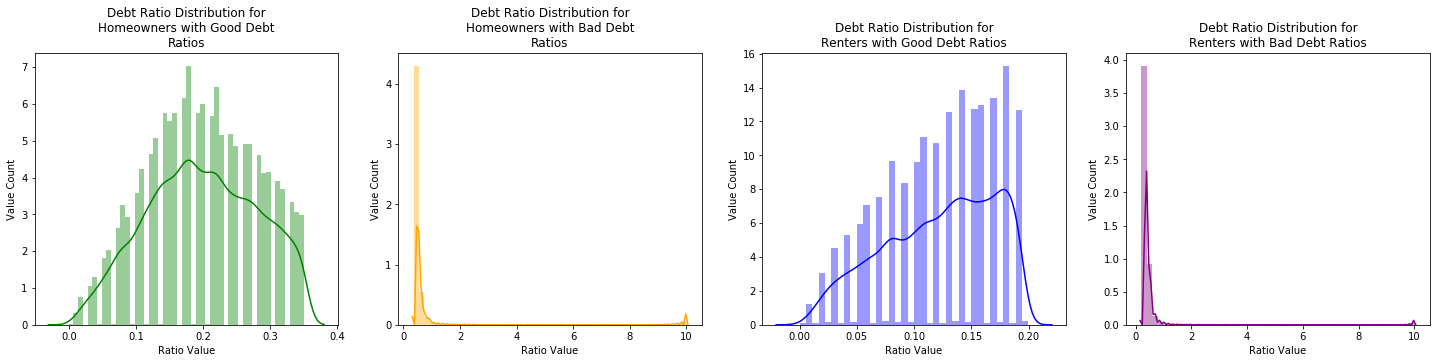

In [17]:
#Creating a histogram of the "debttoincomeratio" column for each group
f, axes = plt.subplots(1,4, figsize=(25,5))
sb.distplot(goodhomerows["debttoincomeratio"],color="green", axlabel='Ratio Value', ax=axes[0]).set_title("\n".join(wrap("Debt Ratio Distribution for Homeowners with Good Debt Ratios", 30)))
sb.distplot(badhomerows["debttoincomeratio"],color="orange", axlabel='Ratio Value', ax=axes[1]).set_title("\n".join(wrap("Debt Ratio Distribution for Homeowners with Bad Debt Ratios", 30)))
sb.distplot(goodrentrows["debttoincomeratio"],color="blue", axlabel='Ratio Value', ax=axes[2]).set_title("\n".join(wrap("Debt Ratio Distribution for Renters with Good Debt Ratios", 30)))
sb.distplot(badrentrows["debttoincomeratio"],color="purple", axlabel='Ratio Value', ax=axes[3]).set_title("\n".join(wrap("Debt Ratio Distribution for Renters with Bad Debt Ratios", 30)))

#Setting the label for the Y-axis on each chart
axes[0].set(ylabel='Value Count')
axes[1].set(ylabel='Value Count')
axes[2].set(ylabel='Value Count')
axes[3].set(ylabel='Value Count')

#Showing the plotgrid
f.show()

#### The groups that have good debt to income ratios seem more balanced than the group with bad ratios.

#### I would like to see how do the loan statuses of the four groups compare.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


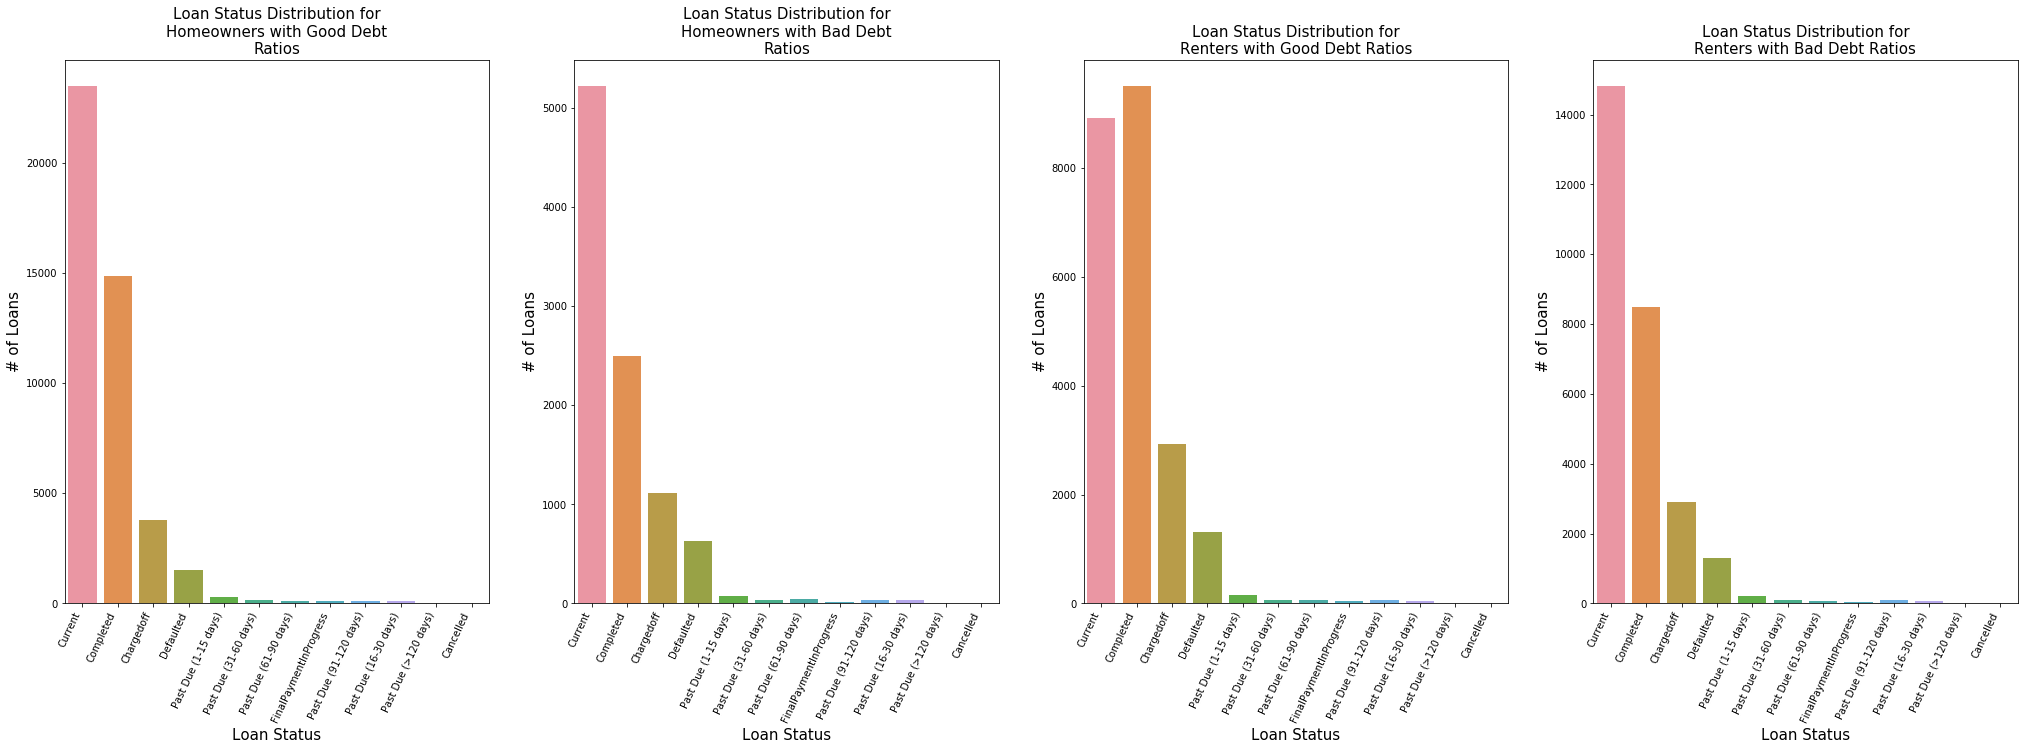

In [18]:
#Displaying the values of the loanstatus column for each group

#Setting the values to be plotted for each chart
goodh=goodhomerows['loanstatus'].value_counts()
badh=badhomerows['loanstatus'].value_counts()
goodr=goodrentrows['loanstatus'].value_counts()
badr=badrentrows['loanstatus'].value_counts()

#Setting the order that the variable values will be plotted in
plot_order = goodh.index

#Creating the barcharts for each category of consumers
f, axes = plt.subplots(1,4,figsize=(35,10))
goodhchart=sb.countplot(data=goodhomerows, x='loanstatus', order=plot_order, ax=axes[0]);
badhchart=sb.countplot(data=badhomerows, x='loanstatus', order=plot_order, ax=axes[1]);
goodrchart=sb.countplot(data=goodrentrows, x='loanstatus', order=plot_order, ax=axes[2]);
badrchart=sb.countplot(data=badrentrows, x='loanstatus', order=plot_order, ax=axes[3]);

#Customizing the labels for the x-axis on each chart
goodhchart.set_xticklabels(goodhchart.get_xticklabels(),rotation=65, horizontalalignment='right')
badhchart.set_xticklabels(badhchart.get_xticklabels(),rotation=65, horizontalalignment='right')
goodrchart.set_xticklabels(goodrchart.get_xticklabels(),rotation=65, horizontalalignment='right')
badrchart.set_xticklabels(badrchart.get_xticklabels(),rotation=65, horizontalalignment='right')

#Setting the chart titles
goodhchart.set_title("\n".join(wrap("Loan Status Distribution for Homeowners with Good Debt Ratios", 30)), fontsize=15)
badhchart.set_title("\n".join(wrap("Loan Status Distribution for Homeowners with Bad Debt Ratios", 30)), fontsize=15)
goodrchart.set_title("\n".join(wrap("Loan Status Distribution for Renters with Good Debt Ratios", 30)), fontsize=15)
badrchart.set_title("\n".join(wrap("Loan Status Distribution for Renters with Bad Debt Ratios", 30)), fontsize=15)

#Setting the axis labels for the charts
goodhchart.set_xlabel('Loan Status', fontsize=15)
goodhchart.set_ylabel('# of Loans', fontsize=15)
badhchart.set_xlabel('Loan Status', fontsize=15)
badhchart.set_ylabel('# of Loans', fontsize=15)
goodrchart.set_xlabel('Loan Status', fontsize=15)
goodrchart.set_ylabel('# of Loans', fontsize=15)
badrchart.set_xlabel('Loan Status', fontsize=15)
badrchart.set_ylabel('# of Loans', fontsize=15)

#Displaying the charts
f.show()

In [19]:
#Printing loan status counts
print("Loan Status counts for Homeowners with a Good Debt Ratio:\n\n",goodh)
print()
print("Loan Status counts for Homeowners with a Bad Debt Ratio:\n\n",badh)
print()
print("Loan Status counts for Renters with a Good Debt Ratio:\n\n",goodr)
print()
print("Loan Status counts for Renters with a Bad Debt Ratio:\n\n",badr)

Loan Status counts for Homeowners with a Good Debt Ratio:

 Current                   23499
Completed                 14844
Chargedoff                 3785
Defaulted                  1532
Past Due (1-15 days)        278
Past Due (31-60 days)       136
Past Due (61-90 days)       123
FinalPaymentInProgress       91
Past Due (91-120 days)       91
Past Due (16-30 days)        88
Past Due (>120 days)          7
Cancelled                     2
Name: loanstatus, dtype: int64

Loan Status counts for Homeowners with a Bad Debt Ratio:

 Current                   5225
Completed                 2497
Chargedoff                1117
Defaulted                  632
Past Due (1-15 days)        77
Past Due (61-90 days)       41
Past Due (31-60 days)       34
Past Due (91-120 days)      32
Past Due (16-30 days)       32
FinalPaymentInProgress      13
Past Due (>120 days)         1
Name: loanstatus, dtype: int64

Loan Status counts for Renters with a Good Debt Ratio:

 Completed                 9515
Curr

#### In all four groups, most loans are either current, completed, chargedoff or defaulted.

In [20]:
#Calculating percentage of consumers that are current on their loans in each group
goodhcurrentpercent=((goodhomerows['loanstatus'] == 'Current').sum()/(len(goodhomerows['loanstatus'])))
badhcurrentpercent=((badhomerows['loanstatus'] == 'Current').sum()/(len(badhomerows['loanstatus'])))
goodrcurrentpercent=((goodrentrows['loanstatus'] == 'Current').sum()/(len(goodrentrows['loanstatus'])))
badrcurrentpercent=((badrentrows['loanstatus'] == 'Current').sum()/(len(badrentrows['loanstatus'])))

#Displaying the calculated percentages
print (goodhcurrentpercent)
print (badhcurrentpercent)
print (goodrcurrentpercent)
print (badrcurrentpercent)

0.528352369817
0.538604267601
0.386296745152
0.527684862287


#### Interestingly, both homeowners and renters with bad debt ratios tend to be current on their loans more than their good ratio counterparts. What about defaulted loans? Let's check below.

In [21]:
#Calculating percentage of consumers that defaulted on their loans in each group
goodhdefaultedpercent=((goodhomerows['loanstatus'] == 'Defaulted').sum()/(len(goodhomerows['loanstatus'])))
badhdefaultedpercent=((badhomerows['loanstatus'] == 'Defaulted').sum()/(len(badhomerows['loanstatus'])))
goodrdefaultedpercent=((goodrentrows['loanstatus'] == 'Defaulted').sum()/(len(goodrentrows['loanstatus'])))
badrdefaultedpercent=((badrentrows['loanstatus'] == 'Defaulted').sum()/(len(badrentrows['loanstatus'])))

#Displaying the calculated percentages
print (goodhdefaultedpercent)
print (badhdefaultedpercent)
print (goodrdefaultedpercent)
print (badrdefaultedpercent)

0.034445543664
0.0651479228945
0.0563971606648
0.0461177140417


#### Homeowners with good debt ratios default the least, while homeowners with bad ratios default the most, even more than all renters.

## Bivariate exploration

#### Let's get a better view of how the debt to income ratio of a consumer interacts with other characterisitcs of their loan. We can start by creating a correlation matrix below. 

In [22]:
goodhomerows.corr()

,prosperratingnumeric,prosperscore,listingcategorynumeric,employmentstatusduration,isborrowerhomeowner,creditscorerangelower,creditscorerangeupper,currentcreditlines,totalcreditlinespast7years,currentdelinquencies,...,tradesneverdelinquentpercentage,debttoincomeratio,incomeverifiable,statedmonthlyincome,loancurrentdaysdelinquent,loanmonthssinceorigination,loanoriginalamount,monthlyloanpayment,investors,acceptabledebtratio
prosperratingnumeric,1.000000,0.729273,-0.102293,-0.003410,NaN,0.589527,0.589527,0.079837,-0.009281,-0.201885,...,0.339700,-0.119978,0.006223,0.088671,-0.163321,-0.144791,0.392253,0.309029,0.337124,NaN
prosperscore,0.729273,1.000000,-0.027081,-0.021666,NaN,0.430019,0.430019,0.002797,-0.038439,-0.143358,...,0.199828,-0.253212,0.014165,0.105703,-0.045416,0.143376,0.262266,0.180103,0.333846,NaN
listingcategorynumeric,-0.102293,-0.027081,1.000000,0.016185,NaN,0.063100,0.063100,-0.084779,-0.021053,-0.002212,...,-0.046741,-0.089125,0.011041,-0.001721,-0.091844,-0.160002,-0.155683,-0.147654,-0.077078,NaN
employmentstatusduration,-0.003410,-0.021666,0.016185,1.000000,NaN,-0.002969,-0.002969,0.076651,0.107529,0.007299,...,0.027379,0.050017,-0.016663,0.038738,-0.061368,-0.141304,0.047767,0.033500,-0.060910,NaN
isborrowerhomeowner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creditscorerangelower,0.589527,0.430019,0.063100,-0.002969,NaN,1.000000,1.000000,0.079569,0.008994,-0.351260,...,0.457375,-0.052587,0.013433,0.102623,-0.246871,-0.170635,0.287394,0.235283,0.318491,NaN
creditscorerangeupper,0.589527,0.430019,0.063100,-0.002969,NaN,1.000000,1.000000,0.079569,0.008994,-0.351260,...,0.457375,-0.052587,0.013433,0.102623,-0.246871,-0.170635,0.287394,0.235283,0.318491,NaN
currentcreditlines,0.079837,0.002797,-0.084779,0.076651,NaN,0.079569,0.079569,1.000000,0.610904,-0.200971,...,0.346546,0.359121,-0.000758,0.219869,-0.045752,-0.068649,0.166090,0.158422,0.033972,NaN
totalcreditlinespast7years,-0.009281,-0.038439,-0.021053,0.107529,NaN,0.008994,0.008994,0.610904,1.000000,0.074251,...,0.067658,0.214215,0.009436,0.193632,-0.008366,-0.042859,0.078773,0.079148,0.001020,NaN
currentdelinquencies,-0.201885,-0.143358,-0.002212,0.007299,NaN,-0.351260,-0.351260,-0.200971,0.074251,1.000000,...,-0.465675,-0.152753,-0.013754,-0.060164,0.196881,0.205939,-0.182624,-0.160494,-0.090199,NaN


Text(0.5,1,'Correlation Heatmap for Homeowners with Good Debt Ratios')

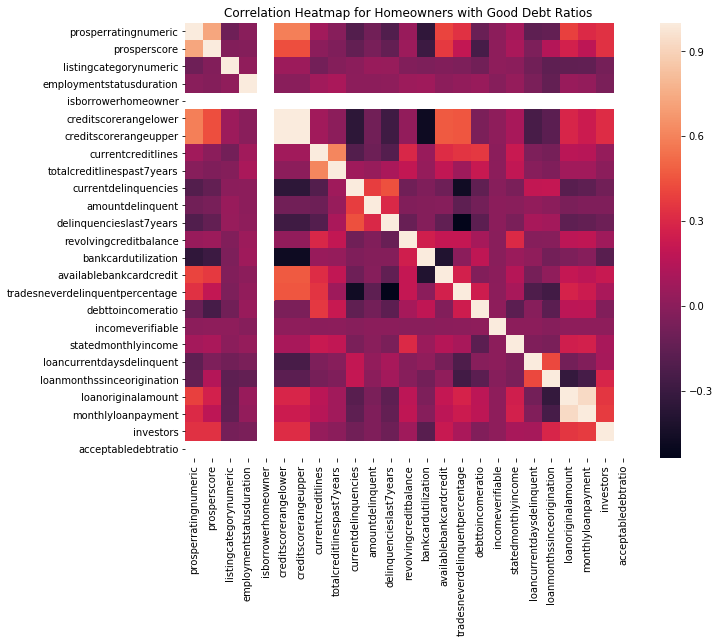

In [23]:
#Creating a heatmap to display a visual of the above matrix.
f, ax = plt.subplots(figsize=(10, 8))
corr = goodhomerows.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title("Correlation Heatmap for Homeowners with Good Debt Ratios")

#### Now we will do the same for the other three groups of rows and compare.

In [24]:
badhomerows.corr()

,prosperratingnumeric,prosperscore,listingcategorynumeric,employmentstatusduration,isborrowerhomeowner,creditscorerangelower,creditscorerangeupper,currentcreditlines,totalcreditlinespast7years,currentdelinquencies,...,tradesneverdelinquentpercentage,debttoincomeratio,incomeverifiable,statedmonthlyincome,loancurrentdaysdelinquent,loanmonthssinceorigination,loanoriginalamount,monthlyloanpayment,investors,acceptabledebtratio
prosperratingnumeric,1.000000,0.668698,-0.162613,0.043132,NaN,0.471395,0.471395,0.047166,-0.004783,-0.113143,...,0.238558,-0.120766,-0.013869,0.158733,-0.171962,-0.186327,0.565092,0.426382,0.269591,NaN
prosperscore,0.668698,1.000000,-0.078858,0.031123,NaN,0.323844,0.323844,0.085312,0.020532,-0.116679,...,0.186907,-0.062104,0.012658,0.129239,-0.068746,0.047017,0.329081,0.214187,0.201632,NaN
listingcategorynumeric,-0.162613,-0.078858,1.000000,0.032830,NaN,0.052333,0.052333,-0.023722,0.010742,-0.008935,...,-0.010744,-0.046929,0.060625,-0.001658,-0.096040,-0.156854,-0.225413,-0.208347,-0.126958,NaN
employmentstatusduration,0.043132,0.031123,0.032830,1.000000,NaN,0.050950,0.050950,0.106640,0.106238,-0.040608,...,0.081410,-0.052425,0.031780,0.171029,-0.083662,-0.148611,0.025339,0.013026,-0.075879,NaN
isborrowerhomeowner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creditscorerangelower,0.471395,0.323844,0.052333,0.050950,NaN,1.000000,1.000000,-0.021566,-0.034980,-0.284466,...,0.382730,-0.037815,0.024088,0.059324,-0.239578,-0.267358,0.311011,0.231002,0.183953,NaN
creditscorerangeupper,0.471395,0.323844,0.052333,0.050950,NaN,1.000000,1.000000,-0.021566,-0.034980,-0.284466,...,0.382730,-0.037815,0.024088,0.059324,-0.239578,-0.267358,0.311011,0.231002,0.183953,NaN
currentcreditlines,0.047166,0.085312,-0.023722,0.106640,NaN,-0.021566,-0.021566,1.000000,0.647365,-0.122860,...,0.238275,-0.059239,0.040976,0.357131,-0.005999,-0.002753,0.031323,0.019273,-0.005225,NaN
totalcreditlinespast7years,-0.004783,0.020532,0.010742,0.106238,NaN,-0.034980,-0.034980,0.647365,1.000000,0.066513,...,0.050566,-0.067741,0.054244,0.339551,-0.001033,-0.008888,-0.020652,-0.029008,-0.040511,NaN
currentdelinquencies,-0.113143,-0.116679,-0.008935,-0.040608,NaN,-0.284466,-0.284466,-0.122860,0.066513,1.000000,...,-0.457778,0.039580,-0.015164,-0.080348,0.161645,0.154991,-0.137095,-0.112822,-0.065936,NaN


Text(0.5,1,'Correlation Heatmap for Homeowners with Bad Debt Ratios')

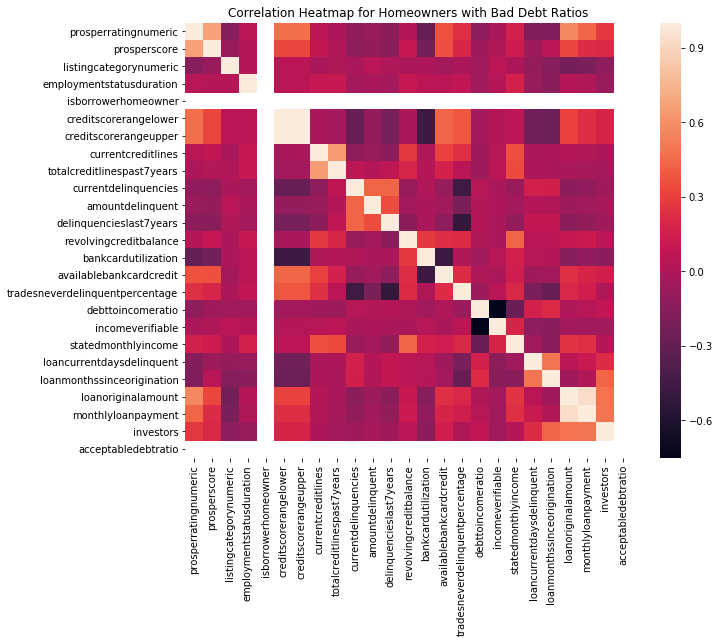

In [25]:
#Creating a heatmap to display a visual of the above matrix.
f, ax = plt.subplots(figsize=(10, 8))
corr = badhomerows.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title("Correlation Heatmap for Homeowners with Bad Debt Ratios")

In [26]:
goodrentrows.corr()

,prosperratingnumeric,prosperscore,listingcategorynumeric,employmentstatusduration,isborrowerhomeowner,creditscorerangelower,creditscorerangeupper,currentcreditlines,totalcreditlinespast7years,currentdelinquencies,...,tradesneverdelinquentpercentage,debttoincomeratio,incomeverifiable,statedmonthlyincome,loancurrentdaysdelinquent,loanmonthssinceorigination,loanoriginalamount,monthlyloanpayment,investors,acceptabledebtratio
prosperratingnumeric,1.000000,0.702244,-0.052618,-0.017117,NaN,0.591775,0.591775,0.210954,0.022700,-0.150774,...,0.315254,0.026968,0.017918,0.129877,-0.171000,-0.103812,0.345298,0.253986,0.288482,NaN
prosperscore,0.702244,1.000000,-0.009163,-0.038181,NaN,0.384156,0.384156,0.105300,-0.022257,-0.102654,...,0.191163,-0.100316,0.031529,0.108371,-0.019573,0.283717,0.219816,0.147098,0.346415,NaN
listingcategorynumeric,-0.052618,-0.009163,1.000000,0.005275,NaN,0.214930,0.214930,-0.078568,-0.004770,-0.130007,...,0.058221,-0.015632,0.023433,0.020754,-0.145260,-0.351931,0.000035,0.006955,-0.047111,NaN
employmentstatusduration,-0.017117,-0.038181,0.005275,1.000000,NaN,0.043464,0.043464,0.060247,0.176518,-0.005228,...,-0.007739,0.031421,-0.022940,0.072544,-0.059896,-0.186760,0.061710,0.053319,-0.067850,NaN
isborrowerhomeowner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creditscorerangelower,0.591775,0.384156,0.214930,0.043464,NaN,1.000000,1.000000,0.156865,0.056735,-0.423086,...,0.546477,0.113817,0.007328,0.151208,-0.329611,-0.448238,0.331261,0.295799,0.262451,NaN
creditscorerangeupper,0.591775,0.384156,0.214930,0.043464,NaN,1.000000,1.000000,0.156865,0.056735,-0.423086,...,0.546477,0.113817,0.007328,0.151208,-0.329611,-0.448238,0.331261,0.295799,0.262451,NaN
currentcreditlines,0.210954,0.105300,-0.078568,0.060247,NaN,0.156865,0.156865,1.000000,0.454381,-0.142384,...,0.278587,0.356127,-0.014879,0.272217,-0.151537,-0.188173,0.216286,0.188966,0.044381,NaN
totalcreditlinespast7years,0.022700,-0.022257,-0.004770,0.176518,NaN,0.056735,0.056735,0.454381,1.000000,0.168193,...,-0.137946,0.188292,0.014300,0.209355,-0.071417,-0.205240,0.126597,0.116937,-0.050903,NaN
currentdelinquencies,-0.150774,-0.102654,-0.130007,-0.005228,NaN,-0.423086,-0.423086,-0.142384,0.168193,1.000000,...,-0.460657,-0.141354,0.002975,-0.091944,0.265770,0.315403,-0.183539,-0.171623,-0.115750,NaN


Text(0.5,1,'Correlation Heatmap for Renters with Good Debt Ratios')

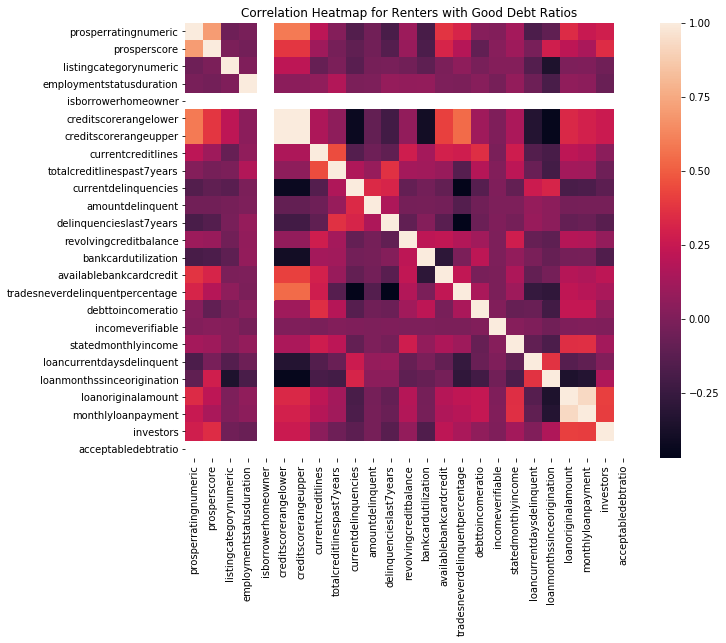

In [27]:
#Creating a heatmap to display a visual of the above matrix.
f, ax = plt.subplots(figsize=(10, 8))
corr = goodrentrows.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title("Correlation Heatmap for Renters with Good Debt Ratios")

In [28]:
goodhomerows.corr()

,prosperratingnumeric,prosperscore,listingcategorynumeric,employmentstatusduration,isborrowerhomeowner,creditscorerangelower,creditscorerangeupper,currentcreditlines,totalcreditlinespast7years,currentdelinquencies,...,tradesneverdelinquentpercentage,debttoincomeratio,incomeverifiable,statedmonthlyincome,loancurrentdaysdelinquent,loanmonthssinceorigination,loanoriginalamount,monthlyloanpayment,investors,acceptabledebtratio
prosperratingnumeric,1.000000,0.729273,-0.102293,-0.003410,NaN,0.589527,0.589527,0.079837,-0.009281,-0.201885,...,0.339700,-0.119978,0.006223,0.088671,-0.163321,-0.144791,0.392253,0.309029,0.337124,NaN
prosperscore,0.729273,1.000000,-0.027081,-0.021666,NaN,0.430019,0.430019,0.002797,-0.038439,-0.143358,...,0.199828,-0.253212,0.014165,0.105703,-0.045416,0.143376,0.262266,0.180103,0.333846,NaN
listingcategorynumeric,-0.102293,-0.027081,1.000000,0.016185,NaN,0.063100,0.063100,-0.084779,-0.021053,-0.002212,...,-0.046741,-0.089125,0.011041,-0.001721,-0.091844,-0.160002,-0.155683,-0.147654,-0.077078,NaN
employmentstatusduration,-0.003410,-0.021666,0.016185,1.000000,NaN,-0.002969,-0.002969,0.076651,0.107529,0.007299,...,0.027379,0.050017,-0.016663,0.038738,-0.061368,-0.141304,0.047767,0.033500,-0.060910,NaN
isborrowerhomeowner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creditscorerangelower,0.589527,0.430019,0.063100,-0.002969,NaN,1.000000,1.000000,0.079569,0.008994,-0.351260,...,0.457375,-0.052587,0.013433,0.102623,-0.246871,-0.170635,0.287394,0.235283,0.318491,NaN
creditscorerangeupper,0.589527,0.430019,0.063100,-0.002969,NaN,1.000000,1.000000,0.079569,0.008994,-0.351260,...,0.457375,-0.052587,0.013433,0.102623,-0.246871,-0.170635,0.287394,0.235283,0.318491,NaN
currentcreditlines,0.079837,0.002797,-0.084779,0.076651,NaN,0.079569,0.079569,1.000000,0.610904,-0.200971,...,0.346546,0.359121,-0.000758,0.219869,-0.045752,-0.068649,0.166090,0.158422,0.033972,NaN
totalcreditlinespast7years,-0.009281,-0.038439,-0.021053,0.107529,NaN,0.008994,0.008994,0.610904,1.000000,0.074251,...,0.067658,0.214215,0.009436,0.193632,-0.008366,-0.042859,0.078773,0.079148,0.001020,NaN
currentdelinquencies,-0.201885,-0.143358,-0.002212,0.007299,NaN,-0.351260,-0.351260,-0.200971,0.074251,1.000000,...,-0.465675,-0.152753,-0.013754,-0.060164,0.196881,0.205939,-0.182624,-0.160494,-0.090199,NaN


Text(0.5,1,'Correlation Heatmap for Renters with Bad Debt Ratios')

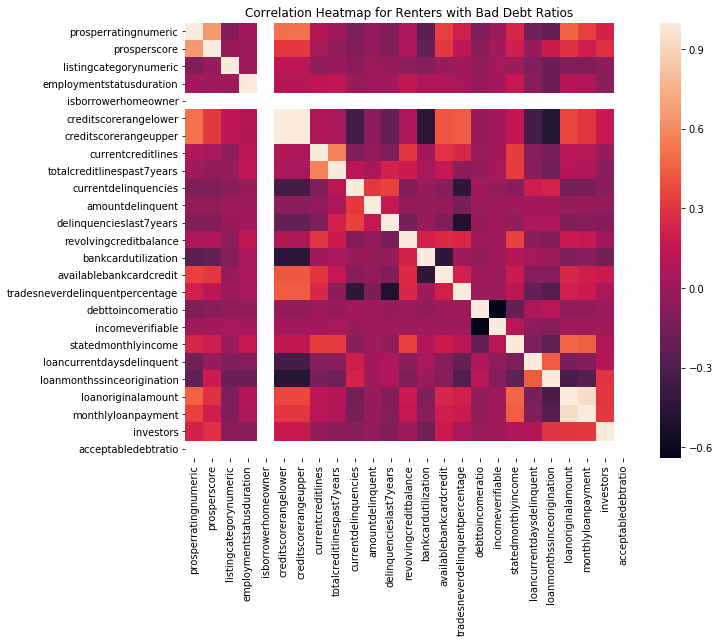

In [29]:
#Creating a heatmap to display a visual of the above matrix.
f, ax = plt.subplots(figsize=(10, 8))
corr = badrentrows.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title("Correlation Heatmap for Renters with Bad Debt Ratios")

#### According to the information above, debt ratio does not have any signifigant statistical correlation, positive (>.50) or negative (<-.50), with any other loan characteristic in any of the four groups.

#### Next I take a look at the relationship between the number of investors and Prosper's numerical rating given to each loan consumer within each group.

Text(0,0.5,'# of Investors')

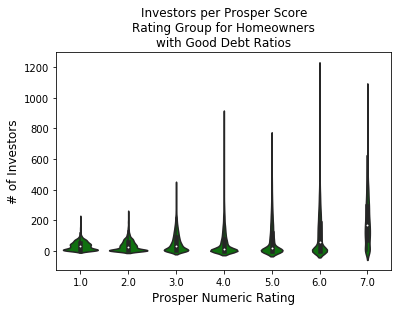

In [30]:
#Creating a violinplot to display the relationship between the number of investors and Prosper's 
#numerical rating given to each loan consumer for homeowners with good debt ratios.
sb.violinplot(data=goodhomerows, x='prosperratingnumeric', y='investors', color='green', innner=None)
plt.title("\n".join(wrap('Investors per Prosper Score Rating Group for Homeowners with Good Debt Ratios', 30)))
plt.xlabel('Prosper Numeric Rating', fontsize=12)
plt.ylabel('# of Investors', fontsize=12)

Text(0,0.5,'# of Investors')

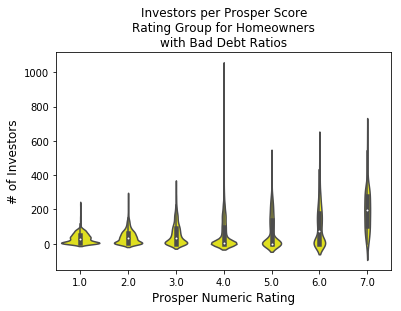

In [31]:
#Creating a violinplot to display the relationship between the number of investors and Prosper's 
#numerical rating given to each loan consumer for homeowners with bad debt ratios.
sb.violinplot(data=badhomerows, x='prosperratingnumeric', y='investors', color='yellow', innner=None)
plt.title("\n".join(wrap('Investors per Prosper Score Rating Group for Homeowners with Bad Debt Ratios', 30)))
plt.xlabel('Prosper Numeric Rating', fontsize=12)
plt.ylabel('# of Investors', fontsize=12)

Text(0,0.5,'# of Investors')

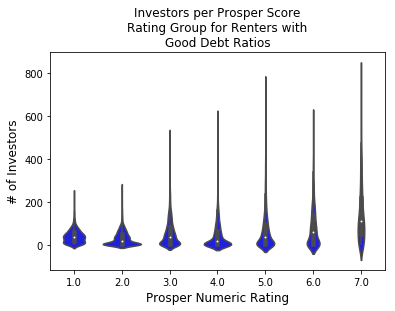

In [32]:
#Creating a violinplot to display the relationship between the number of investors and Prosper's 
#numerical rating given to each loan consumer for renters with good debt ratios.
sb.violinplot(data=goodrentrows, x='prosperratingnumeric', y='investors', color='blue', innner=None)
plt.title("\n".join(wrap('Investors per Prosper Score Rating Group for Renters with Good Debt Ratios', 30)))
plt.xlabel('Prosper Numeric Rating', fontsize=12)
plt.ylabel('# of Investors', fontsize=12)

Text(0,0.5,'# of Investors')

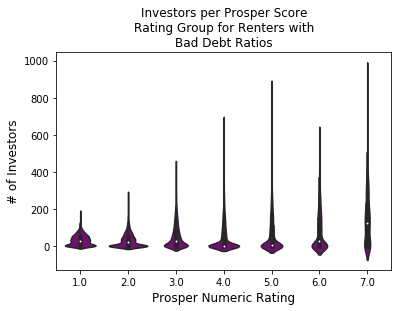

In [33]:
#Creating a violinplot to display the relationship between the number of investors and Prosper's 
#numerical rating given to each loan consumer for renters with bad debt ratios.
sb.violinplot(data=badrentrows, x='prosperratingnumeric', y='investors', color='purple', innner=None)
plt.title("\n".join(wrap('Investors per Prosper Score Rating Group for Renters with Bad Debt Ratios', 30)))
plt.xlabel('Prosper Numeric Rating', fontsize=12)
plt.ylabel('# of Investors', fontsize=12)

#### For all ratio groups, loans of a lesser amount typically have more investors than higher value loans. This is true across all score groups. I found this to be very interesting, since I assumed that the opposite would be true. 

### Multivariate Exploration

#### Now, for each debt ratio group, lets explore the relationship between upper credit score ranges and loan amounts for each Prosper score group. 

Text(0,0.5,'Loan Amount')

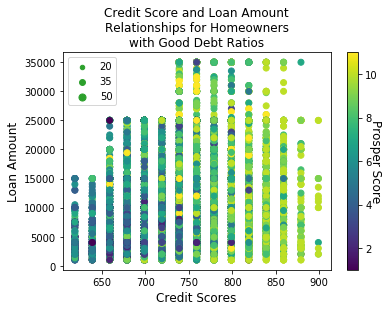

In [34]:
#Creating a scatterbox chart to display relationship between upper credit score 
#ranges and loan amounts for each Prosper score group among homeowners with good debt ratios
plt.scatter(data = goodhomerows, x = 'creditscorerangeupper', y = 'loanoriginalamount', c = 'prosperscore')

#Creating a color bar for Prosper Score and labelling it
plt.colorbar().set_label('Prosper Score', fontsize=12, rotation=270)

#Assigning chart title
plt.title("\n".join(wrap('Credit Score and Loan Amount Relationships for Homeowners with Good Debt Ratios', 30)))

#Setting chart specifications
sizes = [20, 35, 50]
base_color = sb.color_palette()[2]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)

#labelling the chart axes
plt.xlabel('Credit Scores', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

Text(0,0.5,'Loan Amount')

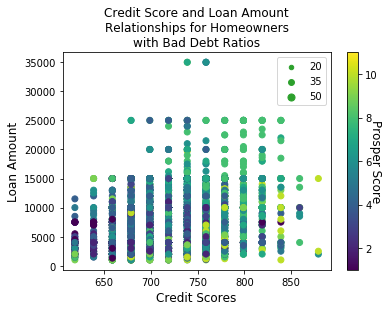

In [35]:
#Creating a scatterbox chart to display relationship between upper credit score 
#ranges and loan amounts for each Prosper score group among homeowners with bad debt ratios
plt.scatter(data = badhomerows, x = 'creditscorerangeupper', y = 'loanoriginalamount', c = 'prosperscore')

#Creating a color bar for Prosper Score and labelling it
plt.colorbar().set_label('Prosper Score', fontsize=12, rotation=270)

#Assigning chart title
plt.title("\n".join(wrap('Credit Score and Loan Amount Relationships for Homeowners with Bad Debt Ratios', 30)))

#Setting chart specifications
sizes = [20, 35, 50]
base_color = sb.color_palette()[2]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)

#labelling the chart axes
plt.xlabel('Credit Scores', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

Text(0,0.5,'Loan Amount')

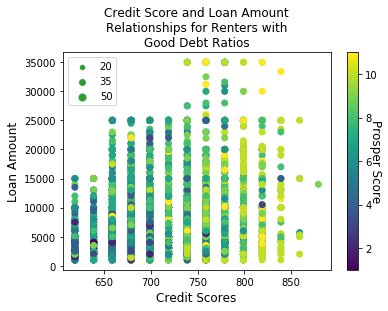

In [36]:
#Creating a scatterbox chart to display relationship between upper credit score 
#ranges and loan amounts for each Prosper score group among renters with good debt ratios
plt.scatter(data = goodrentrows, x = 'creditscorerangeupper', y = 'loanoriginalamount', c = 'prosperscore')

#Creating a color bar for Prosper Score and labelling it
plt.colorbar().set_label('Prosper Score', fontsize=12, rotation=270)

#Assigning chart title
plt.title("\n".join(wrap('Credit Score and Loan Amount Relationships for Renters with Good Debt Ratios', 30)))

#Setting chart specifications
sizes = [20, 35, 50]
base_color = sb.color_palette()[2]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)

#labelling the chart axes
plt.xlabel('Credit Scores', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

Text(0,0.5,'Loan Amount')

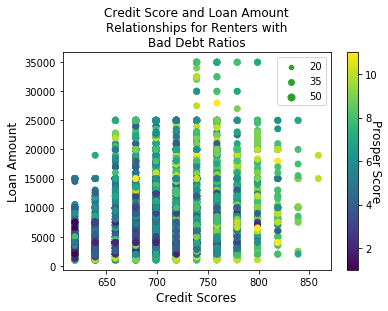

In [37]:
#Creating a scatterbox chart to display relationship between upper credit score 
#ranges and loan amounts for each Prosper score group among renters with bad debt ratios
plt.scatter(data = badrentrows, x = 'creditscorerangeupper', y = 'loanoriginalamount', c = 'prosperscore')

#Creating a color bar for Prosper Score and labelling it
plt.colorbar().set_label('Prosper Score', fontsize=12, rotation=270)

#Assigning chart title
plt.title("\n".join(wrap('Credit Score and Loan Amount Relationships for Renters with Bad Debt Ratios', 30)))

#Setting chart specifications
sizes = [20, 35, 50]
base_color = sb.color_palette()[2]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)

#labelling the chart axes
plt.xlabel('Credit Scores', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

#### For all groups, a creditscore of around 750 or higher seems to be the point where a noticeable rise in Propser score is seen. Loan amounts also seem to correlate positively with both Prosper score and upper credit range. So consumers with higher Prosper scores and upper credit limits are seemingly approved for bigger loans.